In [1]:
# Reading from a MCAP file
# sudo apt install ros-$ROS_DISTRO-ros-base ros-$ROS_DISTRO-ros2bag ros-$ROS_DISTRO-rosbag2-transport ros-$ROS_DISTRO-rosbag2-storage-mcap 
import matplotlib.pyplot as plt
import numpy as np
from mcap import __version__
print(__version__)


"""script that reads ROS2 messages from an MCAP bag using the rosbag2_py API."""
import argparse
from rclpy.serialization import deserialize_message
from rosidl_runtime_py.utilities import get_message
import rosbag2_py


def read_messages(input_bag: str):
    reader = rosbag2_py.SequentialReader()
    reader.open(
        rosbag2_py.StorageOptions(uri=input_bag, storage_id="mcap"),
        rosbag2_py.ConverterOptions(
            input_serialization_format="cdr", output_serialization_format="cdr"
        ),
    )

    topic_types = reader.get_all_topics_and_types()

    def typename(topic_name):
        for topic_type in topic_types:
            if topic_type.name == topic_name:
                return topic_type.type
        raise ValueError(f"topic {topic_name} not in bag")

    while reader.has_next():
        topic, data, timestamp = reader.read_next()
        msg_type = get_message(typename(topic))
        msg = deserialize_message(data, msg_type)
        yield topic, msg, timestamp
    del reader


1.0.2


```
Topic: /lexus3/vehicle_steering | Type: std_msgs/msg/Float32 | Count: 4400
Topic: /lexus3/vehicle_speed | Type: std_msgs/msg/Float32 | Count: 4400
Topic: /lexus3/gps/duro/current_pose | Type: geometry_msgs/msg/PoseStamped | Count: 2970
Topic: /lexus3/gps/duro/status_string | Type: std_msgs/msg/String | Count: 2970
Topic: /lexus3/gps/duro/imu | Type: sensor_msgs/msg/Imu | Count: 14701
Topic: /lexus3/gps/duro/mag | Type: sensor_msgs/msg/MagneticField | Count: 1837
Topic: /tf_static | Type: tf2_msgs/msg/TFMessage | Count: 10
Topic: /tf | Type: tf2_msgs/msg/TFMessage | Count: 2970

Topic: /nissan/gps/duro/current_pose | Type: geometry_msgs/msg/PoseStamped | Count: 1216
Topic: /nissan/gps/duro/imu | Type: sensor_msgs/msg/Imu | Count: 6021
Topic: /nissan/gps/duro/mag | Type: sensor_msgs/msg/MagneticField | Count: 1505
Topic: /nissan/gps/duro/status_string | Type: std_msgs/msg/String | Count: 1216
Topic: /nissan/vehicle_speed | Type: std_msgs/msg/Float32 | Count: 1823
Topic: /nissan/vehicle_steering | Type: std_msgs/msg/Float32 | Count: 1823
```

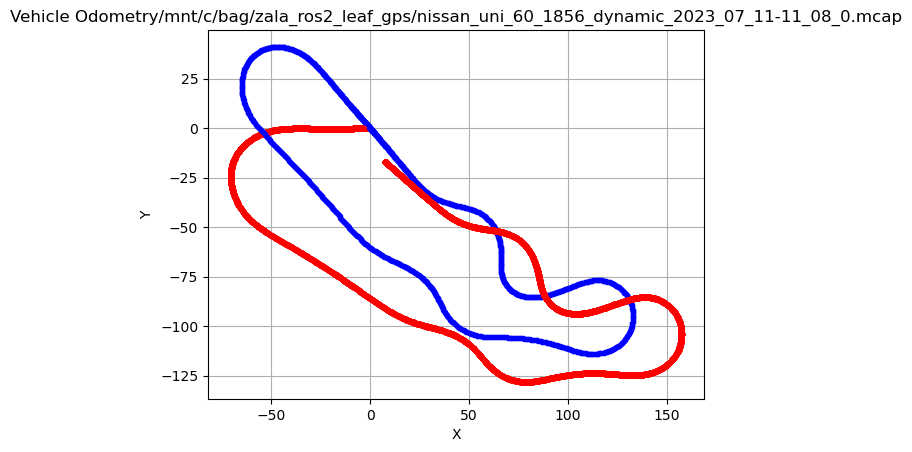

In [7]:
inpu = "/mnt/c/bag/zala_ros2_leaf_gps/nissan_uni_60_1856_dynamic_2023_07_11-11_08_0.mcap"
i = 0
first_run = True
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Vehicle Odometry' + inpu)
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend()
plt.grid(True)
wheelbase = 2.7
theta = 0.0
pos_x = 0.0
pos_y = 0.0
prev_steer_time = 0.0
prev_speed_time = 0.0
steer_time = 0.0
speed_time = 0.0
speed_data = 0.0
steer_data = 0.0
for topic, msg, timestamp in read_messages(inpu):
    if(first_run):
        timestamp_start = timestamp
        first_run = False
    if (i % 1 == 0):
        if(topic == "/nissan/vehicle_steering"):
            steer_data = msg.data
            steer_time = (timestamp-timestamp_start) / 1000000000
        if(topic == "/nissan/vehicle_speed"):
            speed_data = msg.data
            speed_time = (timestamp-timestamp_start) / 1000000000
        if(topic == "/nissan/gps/duro/current_pose"):
            plt.plot(msg.pose.position.x, msg.pose.position.y, 'b.')
        steer_duration = prev_steer_time - steer_time
        speed_duration = prev_speed_time - speed_time
        # Ackermann Bicycle model
        pos_x += speed_duration * speed_data * np.cos(theta)
        pos_y += speed_duration * speed_data * np.sin(theta)
        theta += steer_duration * speed_data / wheelbase * np.tan(steer_data * -0.7)
        prev_steer_time = steer_time
        prev_speed_time = speed_time
        plt.plot(pos_x, pos_y, 'r.')
    i += 1

plt.show()


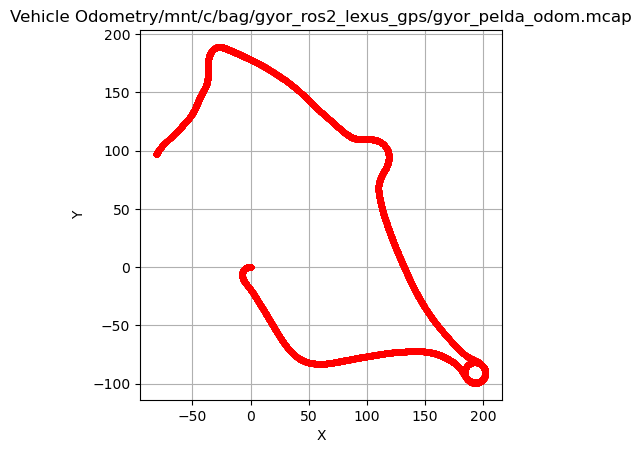

In [8]:
inpu = "/mnt/c/bag/gyor_ros2_lexus_gps/gyor_pelda_odom.mcap"
i = 0
first_run = True
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Vehicle Odometry' + inpu)
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend()
plt.grid(True)
wheelbase = 2.789
theta = 0.0
pos_x = 0.0
pos_y = 0.0
prev_steer_time = 0.0
prev_speed_time = 0.0
steer_time = 0.0
speed_time = 0.0
speed_data = 0.0
steer_data = 0.0
for topic, msg, timestamp in read_messages(inpu):
    if(first_run):
        timestamp_start = timestamp
        first_run = False
    if (i % 1 == 0):
        if(topic == "/lexus3/vehicle_steering"):
            steer_data = msg.data
            steer_time = (timestamp-timestamp_start) / 1000000000
        if(topic == "/lexus3/vehicle_speed"):
            speed_data = msg.data
            speed_time = (timestamp-timestamp_start) / 1000000000
        if(topic == "/lexus3/gps/duro/current_pose"):
            #plt.plot(msg.pose.position.x, msg.pose.position.y, 'b.')
            None
        steer_duration = prev_steer_time - steer_time
        speed_duration = prev_speed_time - speed_time
        # Ackermann Bicycle model
        pos_x += speed_duration * speed_data * np.cos(theta)
        pos_y += speed_duration * speed_data * np.sin(theta)
        theta -= steer_duration * speed_data / wheelbase * np.tan(steer_data)
        prev_steer_time = steer_time
        prev_speed_time = speed_time
        plt.plot(pos_x, pos_y, 'r.')
    i += 1

plt.show()

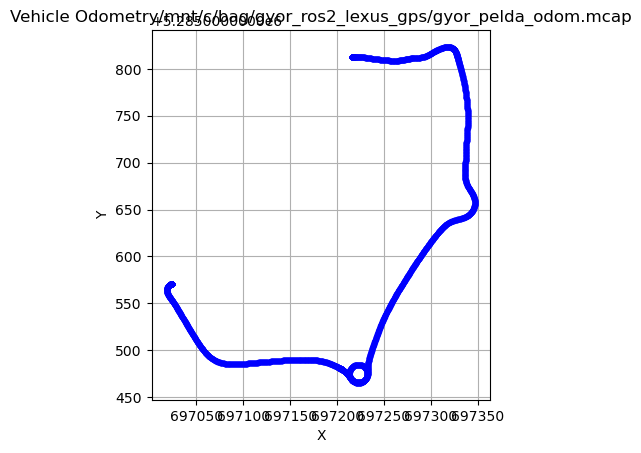

In [ ]:
inpu = "/mnt/c/bag/gyor_ros2_lexus_gps/gyor_pelda_odom.mcap"
i = 0
first_run = True
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Vehicle Odometry' + inpu)
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend()
plt.grid(True)
wheelbase = 2.789
theta = 0.0
pos_x = 0.0
pos_y = 0.0
prev_steer_time = 0.0
prev_speed_time = 0.0
steer_time = 0.0
speed_time = 0.0
speed_data = 0.0
steer_data = 0.0
for topic, msg, timestamp in read_messages(inpu):
    if(first_run):
        timestamp_start = timestamp
        first_run = False
    if (i % 1 == 0):
        if(topic == "/lexus3/vehicle_steering"):
            steer_data = msg.data
            steer_time = (timestamp-timestamp_start) / 1000000000
        if(topic == "/lexus3/vehicle_speed"):
            speed_data = msg.data
            speed_time = (timestamp-timestamp_start) / 1000000000
        if(topic == "/lexus3/gps/duro/current_pose"):
            plt.plot(msg.pose.position.x, msg.pose.position.y, 'b.')
            None
        steer_duration = prev_steer_time - steer_time
        speed_duration = prev_speed_time - speed_time
        # Ackermann Bicycle model
        # pos_x += speed_duration * speed_data * np.cos(theta)
        # pos_y += speed_duration * speed_data * np.sin(theta)
        # theta -= steer_duration * speed_data / wheelbase * np.tan(steer_data)
        # prev_steer_time = steer_time
        # prev_speed_time = speed_time
        # plt.plot(pos_x, pos_y, 'r.')
    i += 1

plt.show()